<a href="https://colab.research.google.com/github/NjoodJ/Training/blob/main/12_Preprocessing_for_Arabic_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
tweets_data_negative = pd.read_csv('/content/test_Arabic_tweets_negative_20190413.csv',sep='\t',header=None, encoding='utf-8')
tweets_data_positive = pd.read_csv('/content/test_Arabic_tweets_positive_20190413.csv',sep='\t',header=None, encoding='utf-8')
tweets_data_negative.head()

,0,1
0,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
1,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
2,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
3,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
4,neg,تتمغط ومعها سداع 😫


In [66]:
tweets_data_positive.head()

,0,1
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...


In [67]:
fulldf = pd.concat([tweets_data_negative,tweets_data_positive], ignore_index=True)
fulldf.head()

,0,1
0,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
1,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
2,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
3,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
4,neg,تتمغط ومعها سداع 😫


In [68]:
fulldf.describe()

,0,1
count,11520,11520
unique,2,8817
top,neg,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
freq,5768,108


In [69]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11520 non-null  object
 1   1       11520 non-null  object
dtypes: object(2)
memory usage: 180.1+ KB


In [70]:
fulldf.columns = ['Label','Tweets']
fulldf.columns
fulldf.head()

,Label,Tweets
0,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
1,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
2,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
3,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
4,neg,تتمغط ومعها سداع 😫


In [71]:
fulldf.to_csv('fulldf.csv')

In [72]:
fulldf['Label'].unique()

array(['neg', 'pos'], dtype=object)

In [ ]:
!pip install plotly
!pip install cufflinks

In [74]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import pandas as pd
import re as regex
import numpy as np
import plotly
from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly
import cufflinks as cf
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

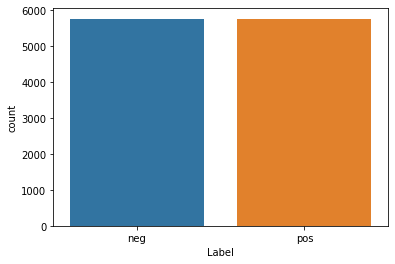

In [75]:
sns.countplot(x='Label',data=fulldf)

In [80]:
import string
punctuatuions = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
def clean_tweets(tweet):
    #remove punctuatuions
    translator = str.maketrans('','',punctuatuions)
    tweet = tweet.translate(translator)
    
    #remove longation
    tweet = re.sub("[إأآا]", "ا", tweet)
    tweet = re.sub("ى", "ي", tweet)
    tweet = re.sub("ؤ", "ء", tweet)
    tweet = re.sub("ئ", "ء", tweet)
    tweet = re.sub("ة", "ه", tweet)
    tweet = re.sub("گ", "ك", tweet)
    
    # remove URL
    tweet = re.sub('http\S+\s*', ' ', tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

    
    # remove special characters 
    tweet = re.sub("@[ا-ي0-9]+", " ", tweet)
    tweet = re.sub("[أ-ي]#+", " ", tweet)
    tweet = re.sub("#[أ-ي]+", " ", tweet)
  
    # remove Numbers
    tweet = re.sub('^[\u0621-\u064A\u0660-\u0669 ]+$', '', tweet)
    tweet = re.sub('\.+', '', tweet)
    tweet = re.sub(':', '', tweet)
    tweet = re.sub('!', '', tweet)
    tweet = re.sub('،','',tweet)
    tweet = re.sub('-','',tweet)
    tweet = re.sub('_','',tweet)
    return tweet

In [81]:
fulldf['Tweets'] = fulldf['Tweets'].apply(clean_tweets)
fulldf['Tweets'].head()

0                  حتي الايتونز خربتوه مو صاحين انتو 😭
1    واحد تبع النظام السوري يقول ان المخابرات السور...
2                                                     
3                      رايح جاي ي طحلبي 🐸 الهلالالاهلي
4                                   تتمغط ومعها سداع 😫
Name: Tweets, dtype: object

In [14]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
tt = TweetTokenizer()
fulldf['Tweets'].apply(tt.tokenize)

0              [حتي, الايتونز, خربتوه, مو, صاحين, انتو, 😭]
1        [واحد, تبع, النظام, السوري, يقول, ان, المخابرا...
2                                                       []
3                   [رايح, جاي, ي, طحلبي, 🐸, الهلالالاهلي]
4                                  [تتمغط, ومعها, سداع, 😫]
                               ...                        
11515                                                   []
11516                              [ربي, يسعدنا, وياكم, 💛]
11517                                                   []
11518    [صباحكم, احتفاليه, لم, تكتمل, وصاحب, الاحتفالي...
11519    [قلت, لكم, سابقا, المعيوف, عندما, تحتاجه, لا, ...
Name: Tweets, Length: 11520, dtype: object

In [82]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
def tokenize(text):
  return word_tokenize(text)

def stemming(words):
  stem_words = []
  for w in words:
    w = ps.stem(w)
    stem_words.append(w)
    return stem_words

fulldf['text'] = fulldf['Tweets'].apply(tokenize)

fulldf['Tokenized'] = fulldf['Tweets'].apply(stemming)
fulldf.head()

,Label,Tweets,text,Tokenized
0,neg,حتي الايتونز خربتوه مو صاحين انتو 😭,"[حتي, الايتونز, خربتوه, مو, صاحين, انتو, 😭]",[ح]
1,neg,واحد تبع النظام السوري يقول ان المخابرات السور...,"[واحد, تبع, النظام, السوري, يقول, ان, المخابرا...",[و]
2,neg,,[],None
3,neg,رايح جاي ي طحلبي 🐸 الهلالالاهلي,"[رايح, جاي, ي, طحلبي, 🐸, الهلالالاهلي]",[ر]
4,neg,تتمغط ومعها سداع 😫,"[تتمغط, ومعها, سداع, 😫]",[ت]


In [83]:
len(fulldf)

11520

In [84]:
words = Counter()
for idx in fulldf.index:
  words.update(fulldf.loc[idx,"text"])
words.most_common(10)

[('من', 1917),
 ('في', 1415),
 ('الله', 1350),
 ('💔', 1251),
 ('علي', 1199),
 ('و', 944),
 ('ما', 797),
 ('لا', 767),
 ('ان', 699),
 ('😂', 671)]

Stopword

In [85]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("arabic")
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [86]:
whitelist= ['لأن','لئن']
whitelist

['لأن', 'لئن']

In [20]:
for idx,stop_word in enumerate(stopwords):
  if stop_word not in whitelist:
    del words[stop_word]
words.most_common(10)

[('الله', 1350),
 ('💔', 1251),
 ('علي', 1199),
 ('ان', 699),
 ('😂', 671),
 ('💙', 652),
 ('انا', 537),
 ('😭', 473),
 ('اللهم', 402),
 ('الهلال', 345)]

In [87]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("arabic")
    whitelist = ['لأن','لئن']
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
   # print(whitelist)
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [89]:
word_list(fulldf)
words = pd.read_csv("wordlist.csv")
words.head(10)

,idx,word,occurrences
0,0,😭,473
1,1,اللهم,402
2,2,الهلال,345
3,3,اللي,345
4,4,🌹,345
5,5,🤔,310
6,6,والله,300
7,7,😔,294
8,8,الخير,282
9,9,رتويت,269


In [90]:
fulldf['Tweets'].head()

0                  حتي الايتونز خربتوه مو صاحين انتو 😭
1    واحد تبع النظام السوري يقول ان المخابرات السور...
2                                                     
3                      رايح جاي ي طحلبي 🐸 الهلالالاهلي
4                                   تتمغط ومعها سداع 😫
Name: Tweets, dtype: object